In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/crop-recommendation-dataset/Crop_Recommendation.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import math
import warnings


warnings.filterwarnings("ignore")


In [3]:
data = pd.read_csv('/kaggle/input/crop-recommendation-dataset/Crop_Recommendation.csv')

In [4]:
print('data size:',data.shape) # shape

data size: (2200, 8)


In [5]:
data.head()

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH_Value,Rainfall,Crop
0,90,42,43,20.879744,82.002744,6.502985,202.935536,Rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,Rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,Rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,Rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,Rice


# EDA

In [6]:
# Data Summary
def get_summary(df):
    df_desc = pd.DataFrame(df.describe(include='all').transpose())
    df_summary = pd.DataFrame({
        'dtype': df.dtypes,
        '#missing': df.isnull().sum().values,
        '#duplicates': df.duplicated().sum(),
        '#unique': df.nunique().values,
        'min': df_desc['min'].values,
        'max': df_desc['max'].values,
        'avg': df_desc['mean'].values,
        'std dev': df_desc['std'].values,
    })
    return df_summary

get_summary(data.drop('Crop',axis=1)).style.background_gradient()

,dtype,#missing,#duplicates,#unique,min,max,avg,std dev
Nitrogen,int64,0,0,137,0.000000,140.000000,50.551818,36.917334
Phosphorus,int64,0,0,117,5.000000,145.000000,53.362727,32.985883
Potassium,int64,0,0,73,5.000000,205.000000,48.149091,50.647931
Temperature,float64,0,0,2200,8.825675,43.675493,25.616244,5.063749
Humidity,float64,0,0,2200,14.258040,99.981876,71.481779,22.263812
pH_Value,float64,0,0,2200,3.504752,9.935091,6.469480,0.773938
Rainfall,float64,0,0,2200,20.211267,298.560117,103.463655,54.958389


# Data Virtualization

In [7]:
metric_col = ['Nitrogen',
 'Phosphorus',
 'Potassium',
 'Temperature',
 'Humidity',
 'pH_Value',
 'Rainfall']

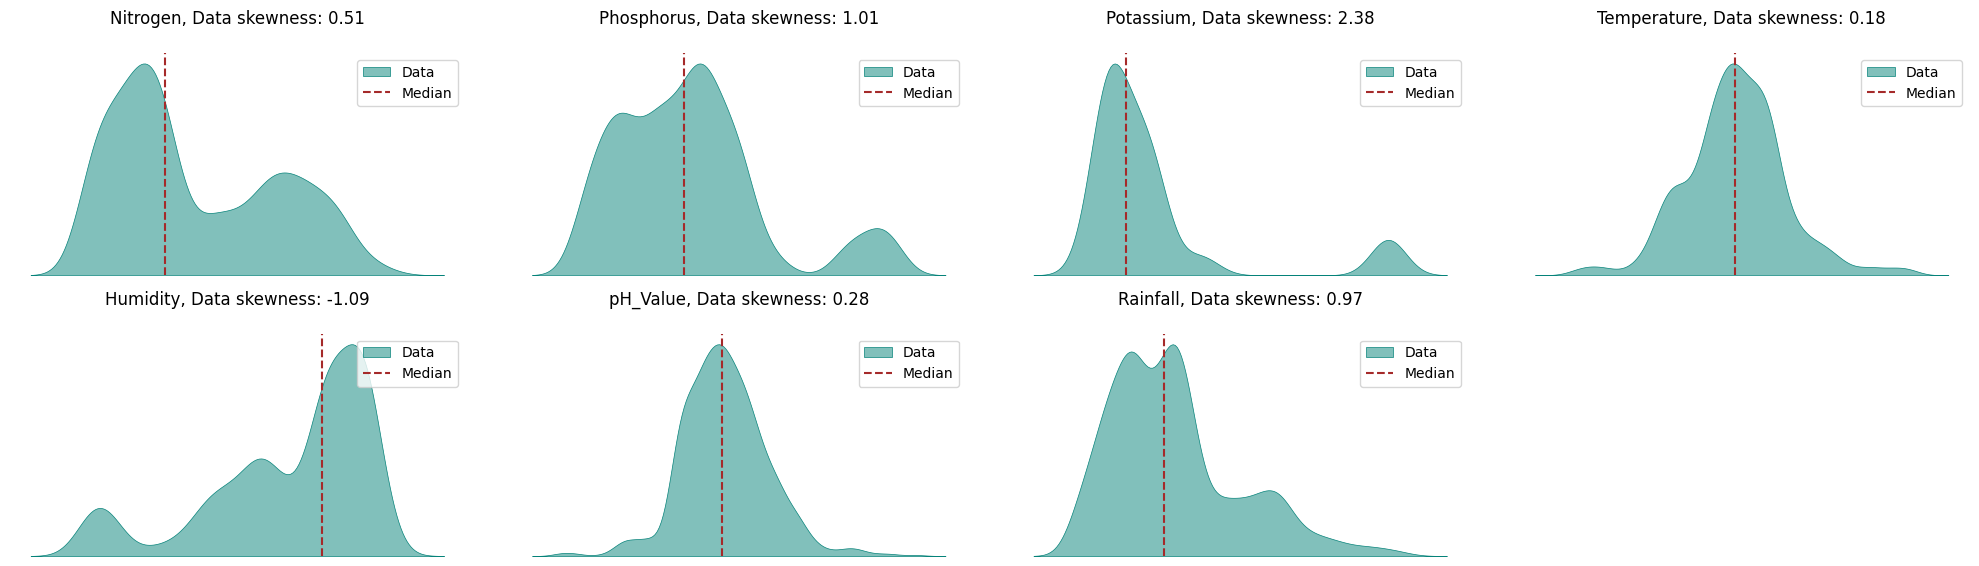

In [8]:
def dist(df_features: pd.DataFrame, 
         ncols=4, 
         labels: tuple[str, str] = (['Data']),
         hide_xlabel=True,
         hide_ylabel=True,
        ) -> None:
    

    
    nrows = (math.ceil(df_features.shape[1]/ncols))
    fig, axes = plt.subplots(nrows=nrows, 
                            ncols=min(df_features.shape[1], ncols), 
                            figsize=(20, nrows*2 + 2))
    axes = axes.flatten() if df_features.shape[1] > 1 else [axes]
    
    for i, col in enumerate(df_features):
        sns.kdeplot(df_features[col], ax=axes[i], fill=True, alpha=0.5, linewidth=0.5, color='#058279', label='Data')
        median_features = df_features[col].median()
        axes[i].axvline(x=median_features, color='#A52A2A', linestyle='--')
        axes[i].legend(labels=[labels[0], 'Median', ])
        title = f'{col}, {labels[0]} skewness: {df_features[col].skew():.2f}\n'
        
        axes[i].set_title(title)
        if hide_xlabel:
            axes[i].set_xlabel('')
            axes[i].set_xticks([])
        if hide_ylabel:
            axes[i].set_ylabel('')
            axes[i].set_yticks([])
        
    plt.tight_layout()
    sns.despine(left=True, bottom=True)
    [fig.delaxes(ax) for ax in axes if not ax.has_data()]
    
dist(df_features= data[metric_col])

In [9]:
# scatter 
def scatter(df_features: pd.DataFrame, 
            ncols=4, 
            hide_xlabel=True,
            hide_ylabel=True,
        ) -> None:
   
    
    num_features = len(df_features.columns) - 1
    fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(15, 8))
    axes = axes.flatten()  # convert  2D array to 1D array

    for i, col in enumerate(df_features.columns[:-1]):
        
        sns.scatterplot(x=df_features[col], ax = axes[i], y=df_features['Crop'], alpha=0.5, linewidth=0.5, color='#058279')
        title = f'{col}'
        
        axes[i].set_title(title)
        if hide_xlabel:
            axes[i].set_xlabel('')
            axes[i].set_xticks([])
        if hide_ylabel:
            axes[i].set_ylabel('')
            axes[i].set_yticks([])
        

    plt.tight_layout()

    [fig.delaxes(ax) for ax in axes if not ax.has_data()]
    
    plt.show()

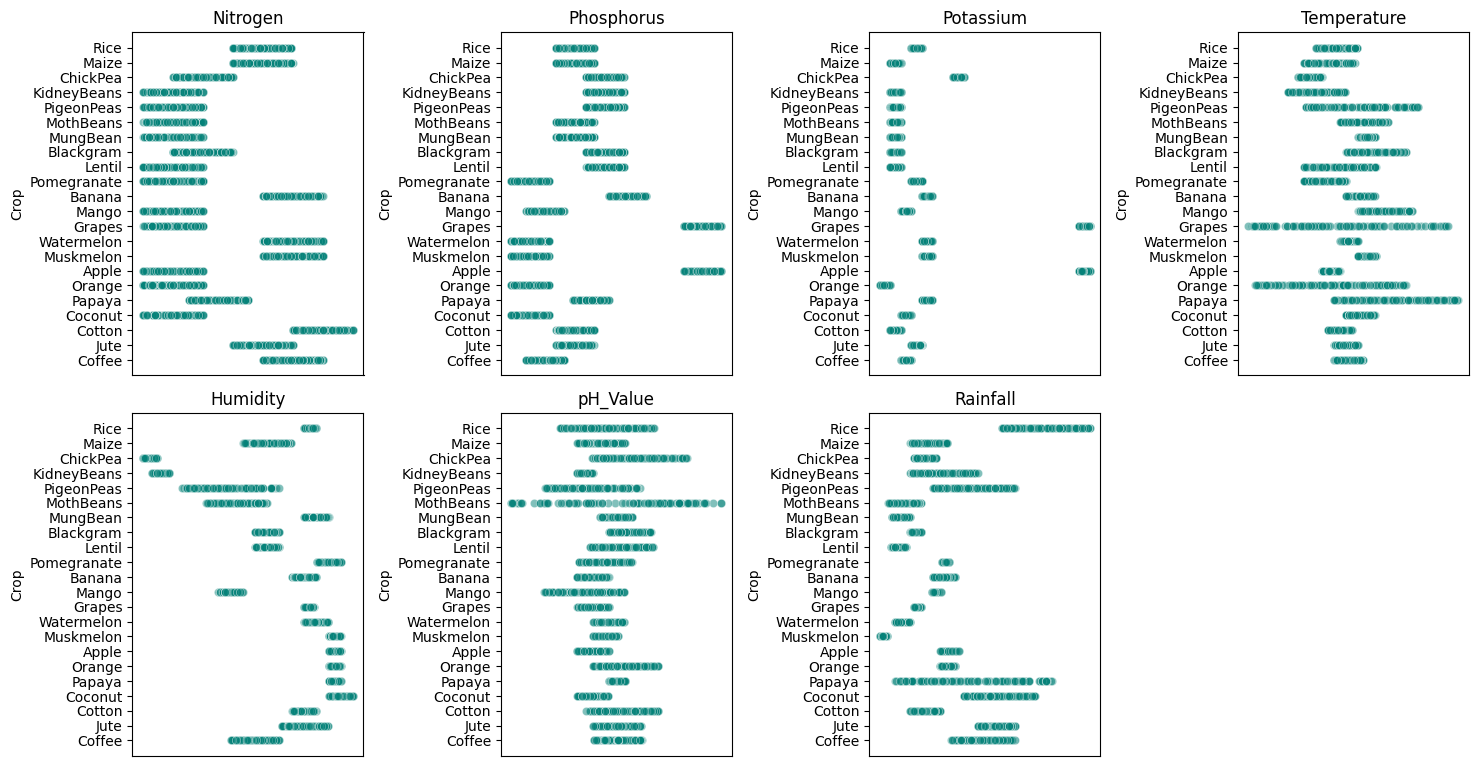

In [10]:
scatter(df_features= data,hide_ylabel=False)

In [11]:
# histogram 
def hist(df_features: pd.DataFrame, 
            ncols=4, 
            hide_xlabel=True,
            hide_ylabel=True,
        ) -> None:
   
    
    num_features = len(df_features.columns) - 1
    fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))
    axes = axes.flatten()  # convert  2D array to 1D array

    for i, col in enumerate(df_features.columns[:-1]):
        
        sns.histplot(x=df_features[col], alpha=0.5, ax= axes[i],linewidth=0.5, color="#00CED1",
                     bins=20,stat='density')
        
        sns.kdeplot(x=df_features[col], ax=axes[i], color="red")
        
        if hide_xlabel:
            axes[i].set_xlabel('')
            axes[i].set_xticks([])
            title = f'{col}'
            axes[i].set_title(title)
            
        if hide_ylabel:
            axes[i].set_ylabel('')
            axes[i].set_yticks([])
        

    plt.tight_layout()

    [fig.delaxes(ax) for ax in axes if not ax.has_data()]
    
    plt.show()


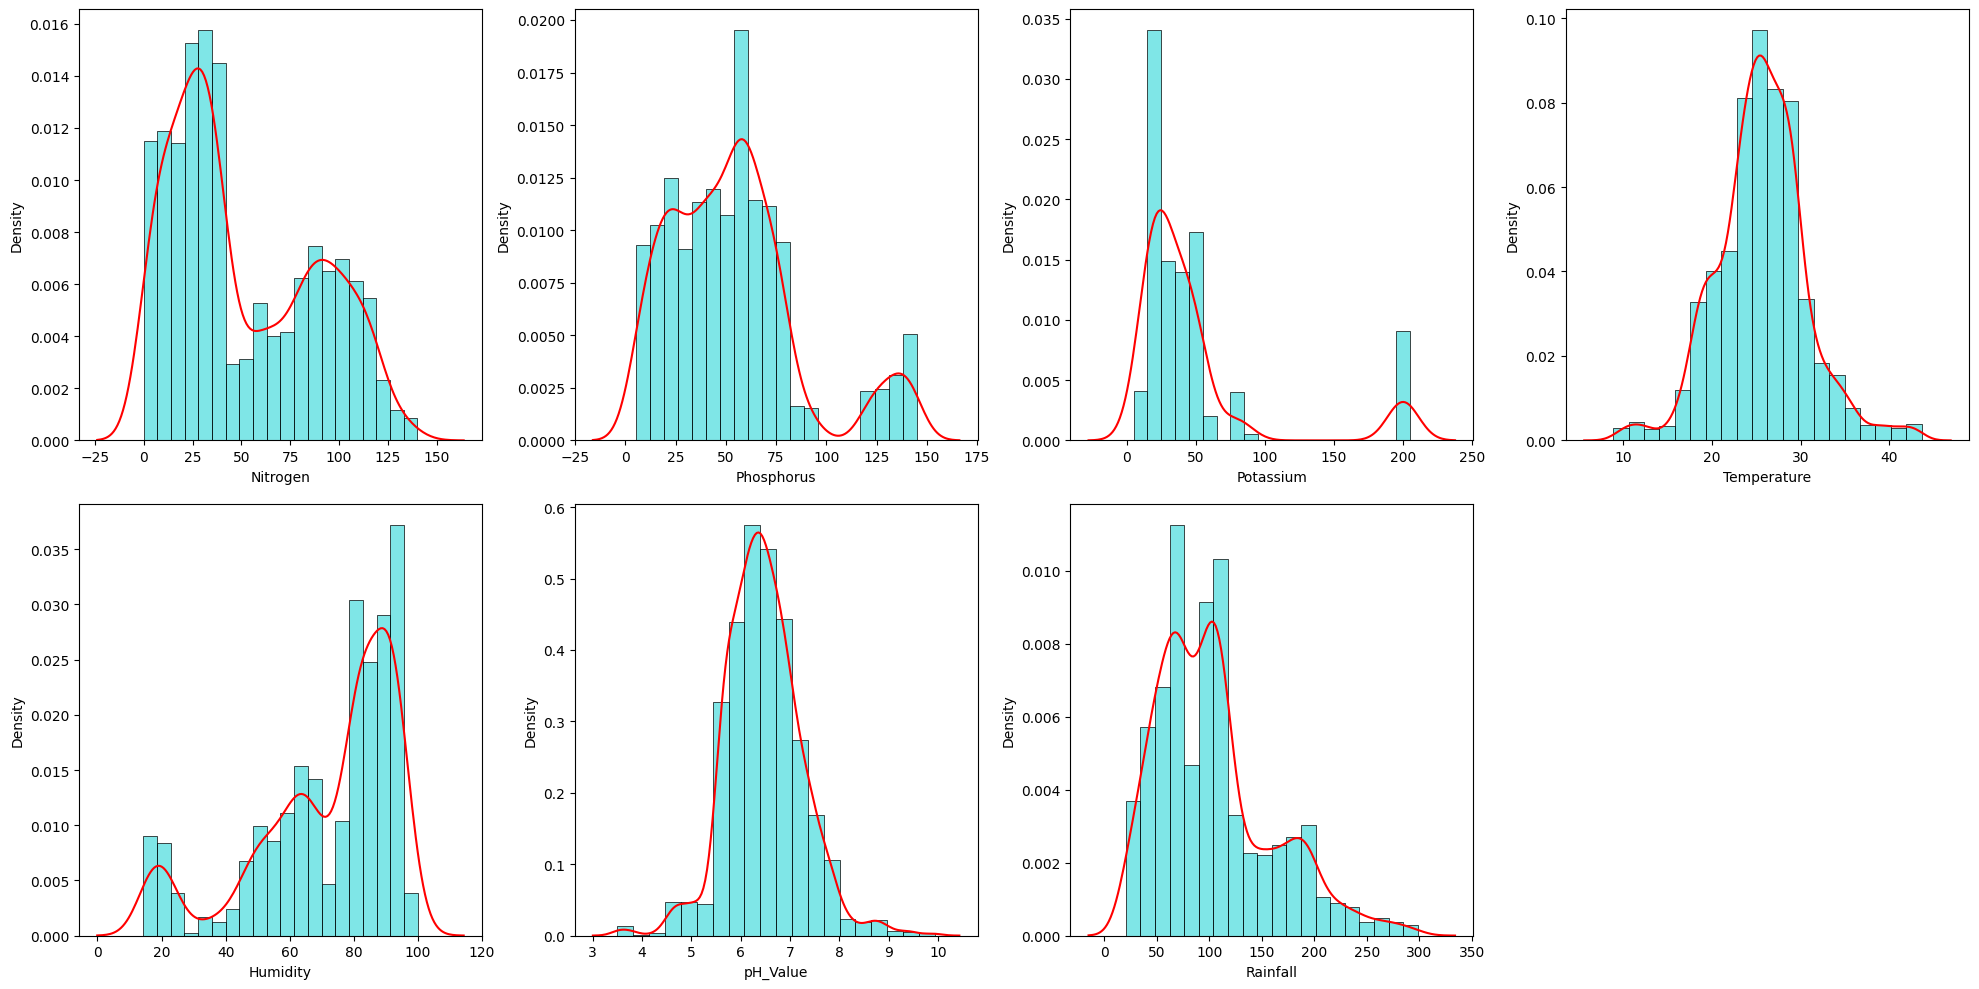

In [12]:
hist(df_features=data, hide_xlabel=False, hide_ylabel=False)

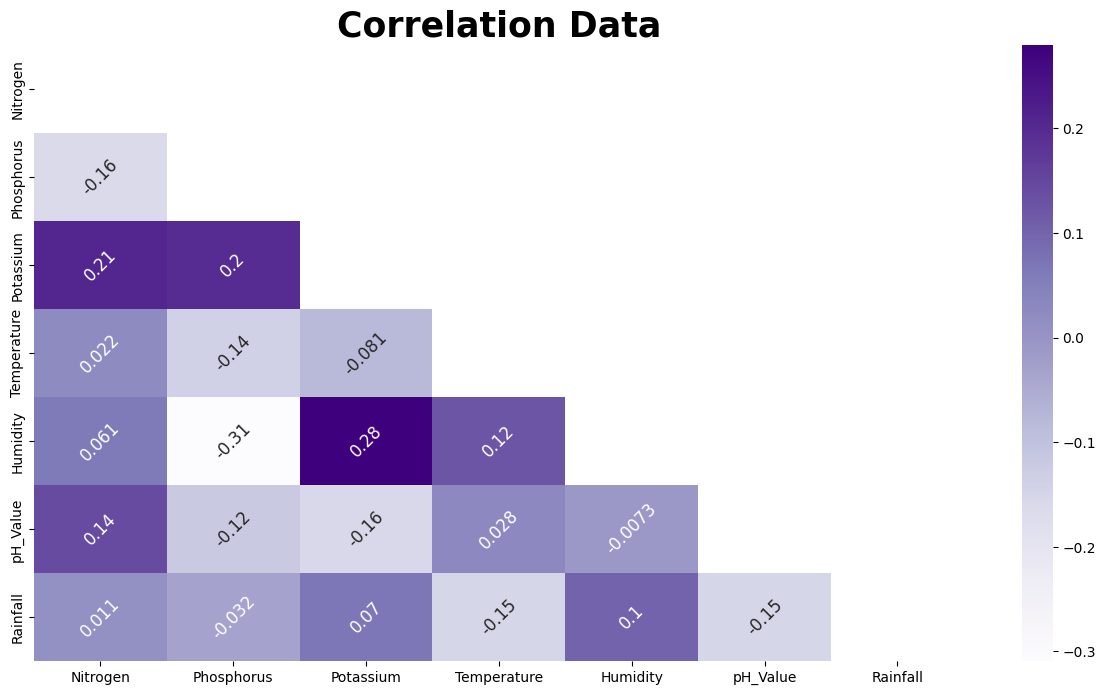

In [13]:
corr = data._get_numeric_data().corr(method='spearman')
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)]=True
fig, ax = plt.subplots(figsize=(15,8))
sns.heatmap(data=corr, 
        mask=mask , 
        annot=True,
        cmap='Purples',
        annot_kws={'size': 12, 'rotation': 45},
        ax=ax
        );
ax.set_title('Correlation Data',fontsize=25, fontweight='bold');

# Drop Outliers

In [14]:
# boxplot

# histogram 
def boxplot(df_features: pd.DataFrame, 
            ncols=4, 
            hide_xlabel=True,
            hide_ylabel=True,
        ) -> None:
   
    
    num_features = len(df_features.columns) - 1
    fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 15))
    axes = axes.flatten()  # convert  2D array to 1D array

    for i, col in enumerate(df_features.columns[:-1]):
    
        sns.boxplot(y=df_features[col], data = df_features, hue ='Crop', ax= axes[i],
                    linewidth=0.5, color="#8A2BE2")
    
        
        if hide_xlabel:
            axes[i].set_xlabel('')
            axes[i].set_xticks([])
            title = f'{col}'
            axes[i].set_title(title)
            
        if hide_ylabel:
            axes[i].set_ylabel('')
            axes[i].set_yticks([])
        

    plt.tight_layout()

    [fig.delaxes(ax) for ax in axes if not ax.has_data()]
    
    plt.show()


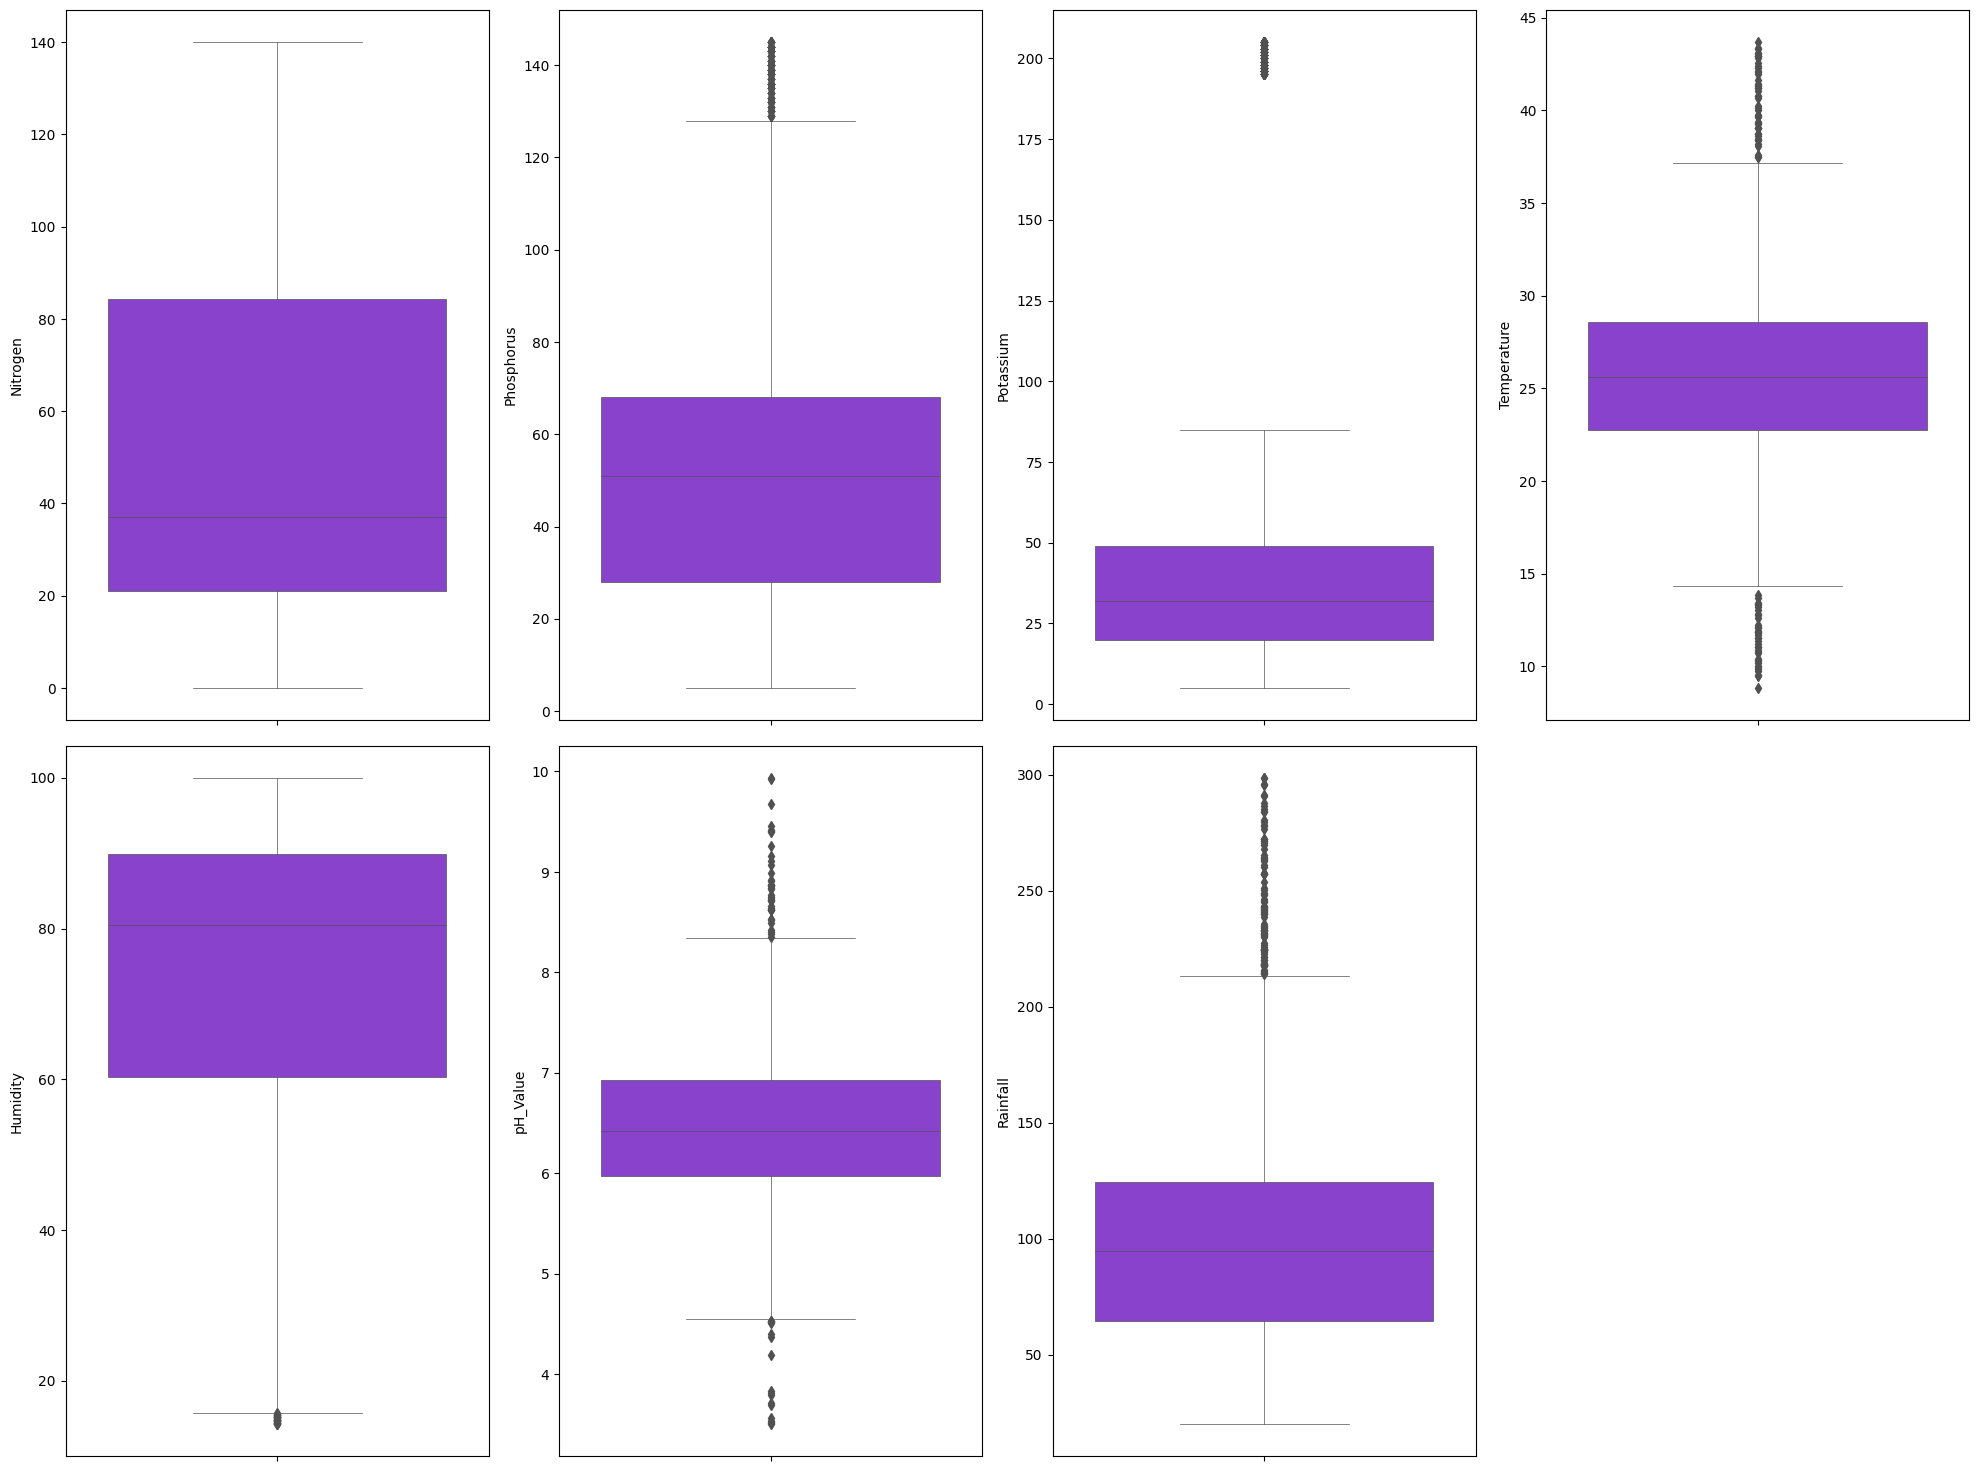

In [15]:
boxplot(df_features=data,hide_xlabel=False,hide_ylabel=False)

* In potassium, there are clustered data outside the normal distribution of the data set. We can remove this data.

In [16]:
def remove_outliers(df_features,
                   data = data) -> None:

    print("Old Shape: ", data.shape)

    ''' Detection '''
    # IQR
    # Calculate the upper and lower limits
    Q1 = df_features.quantile(0.25)
    Q3 = df_features.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR

    # Create arrays of Boolean values indicating the outlier rows
    upper_array = np.where(df_features >= upper)[0]
    lower_array = np.where(df_features <= lower)[0]

    data.drop(index=upper_array, inplace=True)
    data.drop(index=lower_array, inplace=True)

    print("New Shape: ", data.shape)
    return data

remove_outliers(df_features = data['Potassium'])

Old Shape:  (2200, 8)
New Shape:  (2000, 8)


,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH_Value,Rainfall,Crop
0,90,42,43,20.879744,82.002744,6.502985,202.935536,Rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,Rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,Rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,Rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,Rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,Coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,Coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,Coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,Coffee


# Label Encoding

In [17]:
from sklearn.preprocessing import LabelEncoder

In [18]:
le = LabelEncoder()
data['Crop'] = le.fit_transform(data['Crop'])

# Model building

In [19]:
from sklearn.model_selection import train_test_split , StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler


# hyperparameters tuning
import optuna


model_scores = pd.DataFrame([],columns = ['Accuracy','Validation_Acc'])

In [20]:
# Split data
X = data.drop('Crop',axis=1)
y = data['Crop']

train_x, valid_x, train_y, valid_y = train_test_split(X,y, test_size = 0.2, random_state=11, stratify=y)

In [21]:
# sizes 
print(f'train size: {train_x.shape}\ntest size: {valid_x.shape}')

train size: (1600, 7)
test size: (400, 7)


# XGBOOST Optuna

In [22]:
def objective(trial) -> None:
    X = data.drop('Crop',axis=1)
    y = data['Crop']
    train_x, valid_x, train_y, valid_y = train_test_split(X,y, test_size = 0.2, random_state=11, stratify=y)
    
    params = {
    "n_estimators": trial.suggest_int("n_estimators",100,1000),
    'min_child_weight' : trial.suggest_float("min_child_weight", 1e-3, 0.1, log=True),
    "max_depth": trial.suggest_int("max_depth", 3, 15),
    'gamma': trial.suggest_float("gamma", 0.001, 1),
    'lambda' : trial.suggest_float("lambda", 0.001, 1),
    'alpha' : trial.suggest_float("alpha", 0.001, 1),
    "subsample": trial.suggest_float("subsample", 0.5, 1.0),
    "colsample_bytree": trial.suggest_float("colsample_bytree", 0.5, 1.0),
    "learning_rate": trial.suggest_float("learning_rate", 1e-3, 0.1, log=True),
    'max_leaf_nodes': trial.suggest_float("max_leaf_nodes", 0.01, 1.0),
    'device': 'cuda' ,
    'objective':'multi:softmax'
    }
    
    cv = StratifiedKFold(n_splits=5 , shuffle= True, random_state = 17)
    scores = []
    for _,(train_index, valid_index) in enumerate(cv.split(train_x, train_y)):
        X_train, y_train = train_x.iloc[train_index], train_y.iloc[train_index]
        X_valid, y_valid = train_x.iloc[valid_index], train_y.iloc[valid_index]
        model = XGBClassifier(**params)

        model.fit(X_train, y_train, 
              eval_set=[(X_valid, y_valid)],
              early_stopping_rounds=80,
              verbose=False)

        y_pred = model.predict(X_valid)
        scores.append(metrics.accuracy_score(y_valid, y_pred))
    return np.mean(scores)
    
    
if __name__ == "__main__":

    study = optuna.create_study(direction='maximize', study_name="optuna_xgboostC")
    study.optimize(objective, n_trials=100)
    
    print("Best trial:")
    trial = study.best_trial
    
    print("Number of finished trials: {}".format(len(study.trials)))
    
    print(f"Best trial average Accuracy: {study.best_value:.4f}")
    
    print("  Value: {}".format(trial.value))
    
    print("  Params: ")
    for key, value in study.best_params.items():
        print(f"{key}: {value}")

[I 2024-05-20 12:45:51,575] A new study created in memory with name: optuna_xgboostC
[I 2024-05-20 12:46:10,935] Trial 0 finished with value: 0.990625 and parameters: {'n_estimators': 826, 'min_child_weight': 0.011039013456760123, 'max_depth': 11, 'gamma': 0.3566589142006575, 'lambda': 0.679284371148886, 'alpha': 0.8362428343971933, 'subsample': 0.5213289682750284, 'colsample_bytree': 0.8390389422345257, 'learning_rate': 0.022135627723289565, 'max_leaf_nodes': 0.023002678904859946}. Best is trial 0 with value: 0.990625.
[I 2024-05-20 12:46:19,126] Trial 1 finished with value: 0.9868750000000001 and parameters: {'n_estimators': 182, 'min_child_weight': 0.012019403294237774, 'max_depth': 15, 'gamma': 0.8371515000959151, 'lambda': 0.02743182654878339, 'alpha': 0.4125035221682169, 'subsample': 0.8537071120807851, 'colsample_bytree': 0.8929253151440553, 'learning_rate': 0.003935433111515317, 'max_leaf_nodes': 0.08511212688794659}. Best is trial 0 with value: 0.990625.
[I 2024-05-20 12:46:33

Best trial:
Number of finished trials: 100
Best trial average Accuracy: 0.9969
  Value: 0.996875
  Params: 
n_estimators: 719
min_child_weight: 0.07842204051275863
max_depth: 12
gamma: 0.6414641115221564
lambda: 0.4612855117308662
alpha: 0.945157313420475
subsample: 0.9725860164451577
colsample_bytree: 0.5238514768543842
learning_rate: 0.018967220707336516
max_leaf_nodes: 0.38274240280245975


In [23]:
XGB_Params ={  
'n_estimators': 819,
'min_child_weight': 0.035384072273014815,
'max_depth': 9,
'gamma': 0.8364033746052706,
'lambda': 0.48063683890483966,
'alpha': 0.40332951978878206,
'subsample': 0.9706722692110294,
'colsample_bytree': 0.5215086104110591,
'learning_rate': 0.011079730075062052,
'max_leaf_nodes': 0.2367564262755904}

mms = MinMaxScaler()
train_scaled = mms.fit_transform(train_x)
valid_scaled = mms.transform(valid_x)

model = XGBClassifier(**XGB_Params)
model.fit(train_scaled,train_y)

preds = model.predict(valid_scaled)

accuracy = metrics.accuracy_score(valid_y,preds)
model_scores.loc['XGBClassifier'] = [accuracy,study.best_value]


# RandomForestClassifier Optuna

In [24]:
from optuna.samplers import TPESampler

def objective(trial):
    X = data.drop('Crop',axis=1)
    y = data['Crop']
    train_x, valid_x, train_y, valid_y = train_test_split(X,y, test_size = 0.2, 
                                                    random_state=11, stratify=y)

    rfc_params = {
        'max_leaf_nodes': trial.suggest_int('max_leaf_nodes', 2,10),
        'n_estimators': trial.suggest_int('n_estimators', 300, 1200),
        'ccp_alpha': trial.suggest_float('ccp_alpha', 0.01, 1.0),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 6),
        'max_features': trial.suggest_int('max_features', 1, 8),
        'max_depth': trial.suggest_int('max_depth', 1, 15),
    }
   
    scores = list()

    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    scores = []
    for _, (train_index, valid_index) in enumerate(cv.split(train_x, train_y)):
        X_train, y_train = train_x.iloc[train_index], train_y.iloc[train_index]
        X_valid, y_valid = train_x.iloc[valid_index], train_y.iloc[valid_index]

        model = RandomForestClassifier(**rfc_params, random_state=42)

        model.fit(X_train, y_train)
        
        y_pred = model.predict(X_valid)
        acc = metrics.accuracy_score(y_valid, y_pred)
        scores.append(acc)
        
    return np.mean(scores)
    


if __name__ == "__main__":

    study = optuna.create_study(direction='maximize', study_name="optuna_rfc")
    study.optimize(objective, n_trials=80)
    
    print("Best trial:")
    trial = study.best_trial
    
    print("Number of finished trials: {}".format(len(study.trials)))
    
    print(f"Best trial average Accuracy: {study.best_value:.4f}")
    
    print("  Value: {}".format(trial.value))
    
    print("  Params: ")
    for key, value in study.best_params.items():
        print(f"{key}: {value}")

[I 2024-05-20 13:08:42,045] A new study created in memory with name: optuna_rfc
[I 2024-05-20 13:08:47,336] Trial 0 finished with value: 0.05 and parameters: {'max_leaf_nodes': 9, 'n_estimators': 340, 'ccp_alpha': 0.9458070619943103, 'min_samples_split': 6, 'max_features': 1, 'max_depth': 10}. Best is trial 0 with value: 0.05.
[I 2024-05-20 13:09:08,148] Trial 1 finished with value: 0.05 and parameters: {'max_leaf_nodes': 7, 'n_estimators': 1166, 'ccp_alpha': 0.9880197324358372, 'min_samples_split': 6, 'max_features': 5, 'max_depth': 2}. Best is trial 0 with value: 0.05.
[I 2024-05-20 13:09:14,062] Trial 2 finished with value: 0.05 and parameters: {'max_leaf_nodes': 3, 'n_estimators': 416, 'ccp_alpha': 0.5374013482925944, 'min_samples_split': 5, 'max_features': 1, 'max_depth': 3}. Best is trial 0 with value: 0.05.
[I 2024-05-20 13:09:23,021] Trial 3 finished with value: 0.05 and parameters: {'max_leaf_nodes': 9, 'n_estimators': 450, 'ccp_alpha': 0.19970365583788932, 'min_samples_split'

Best trial:
Number of finished trials: 80
Best trial average Accuracy: 0.9238
  Value: 0.9237500000000001
  Params: 
max_leaf_nodes: 6
n_estimators: 305
ccp_alpha: 0.011341375441604637
min_samples_split: 4
max_features: 2
max_depth: 12


In [25]:
rfc_params = { 
    'n_estimators': 781,
    'ccp_alpha': 0.01702239721335909,
    'min_samples_split': 3,
    'max_features': 8,
    'max_depth': 8
}

mms = MinMaxScaler()
train_scaled = mms.fit_transform(train_x)
valid_scaled = mms.transform(valid_x)

model = RandomForestClassifier(**rfc_params)
model.fit(train_scaled,train_y)

preds = model.predict(valid_scaled)

rfc_acc = metrics.accuracy_score(valid_y,preds)
model_scores.loc['RFClassifier'] = [rfc_acc,study.best_value]
    


# KNeighborsClassifier

In [26]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score,GridSearchCV

In [27]:
knn = KNeighborsClassifier()

pipe = Pipeline([('scaler',StandardScaler()),('classifier',knn)])


params = {'classifier__n_neighbors': np.arange(2,50)}

cv = StratifiedKFold(n_splits = 5,shuffle=True,random_state=18)

clf = GridSearchCV(pipe, param_grid=params, cv=cv, n_jobs=-1,scoring='accuracy',
                  verbose=0)



history = clf.fit(train_x,train_y)
print(f'best parameters: {clf.best_params_}')
print(f'best score: {clf.best_score_}')

best parameters: {'classifier__n_neighbors': 3}
best score: 0.971875


In [28]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(train_x,train_y)
pred  = knn.predict(valid_x)
knn_acc = metrics.accuracy_score(valid_y,pred)

model_scores.loc['KNN Classifier'] = [knn_acc,clf.best_score_]

# Result

**Best model is XGBoostClassifier and model accuracy is 0.9925.**

In [29]:
model_scores

,Accuracy,Validation_Acc
XGBClassifier,0.9925,0.996875
RFClassifier,0.9700,0.923750
KNN Classifier,0.9825,0.971875


<Axes: >

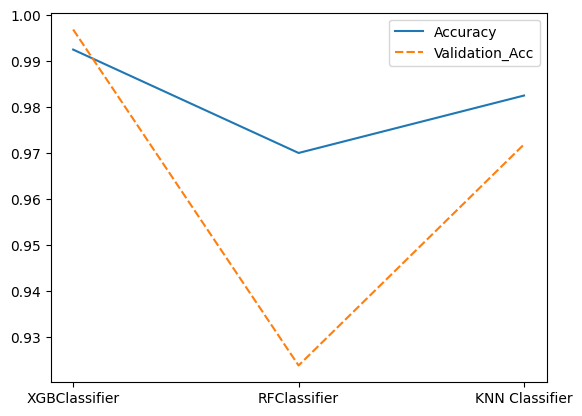

In [30]:
sns.lineplot(model_scores)